![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 2: Regression

## Life Satisfaction vs. GDP Revisted
Let's revisit our previous take-home exercise of attempting to find the relationship between the Life Satisfaction data (from OECD) and GDP per capita data (from IMF). This relationship can be captured by modeling it as a regression problem.

The goal was to find out if people were really happy and satisfied when their country is doing well economically. 

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
from IPython.display import display

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Load Data

Load data from their respective CSV files.

In [2]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv")
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
display(oecd_bli.head(10))

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [3]:
gdp = pd.read_csv("gdp_per_capita.csv", thousands=',', encoding='latin-1', na_values='n/a')
gdp.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp.set_index("Country", inplace=True)
display(gdp.head(10))

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.850,2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.870,2014.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.030,2015.0


Check and make sure that the numerical data (integers and floats) that are in the range of thousands have dropped its comma when the CSV was read. This is so that you can plot or perform regression without any errors.

The two dataframes are then merged.

In [4]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
display(full_country_stats['GDP per capita'])
print("Number of rows after merging: ",len(full_country_stats))

Country
Brazil               8670.00
Mexico               9009.28
Russia               9054.91
Turkey               9437.37
Hungary             12239.89
Poland              12495.33
Chile               13340.91
Slovak Republic     15991.74
Czech Republic      17256.92
Estonia             17288.08
Greece              18064.29
Portugal            19121.59
Slovenia            20732.48
Spain               25864.72
Korea               27195.20
Italy               29866.58
Japan               32485.55
Israel              35343.34
New Zealand         37044.89
France              37675.01
Belgium             40106.63
Germany             40996.51
Finland             41973.99
Canada              43331.96
Netherlands         43603.12
Austria             43724.03
United Kingdom      43770.69
Sweden              49866.27
Iceland             50854.58
Australia           50961.87
Ireland             51350.74
Denmark             52114.17
United States       55805.20
Norway              74822.11
Switze

Number of rows after merging:  36


The number of rows left after performing an inner join should be less than what the two dataframes started with. These are the countries that have both the GDP per capita data, and Life Satisfaction data.

In [5]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.2
Life satisfaction        7.2
Name: United States, dtype: float64

Next, we want to arbitrarily remove a few rows of data for the sake of making predictions later. The rest are kept for learning the model.

In [6]:
full_country_stats.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Subject Descriptor', 'Units',
       'Scale', 'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')

In [7]:
full_country_stats.index

Index(['Brazil', 'Mexico', 'Russia', 'Turkey', 'Hungary', 'Poland', 'Chile',
       'Slovak Republic', 'Czech Republic', 'Estonia', 'Greece', 'Portugal',
       'Slovenia', 'Spain', 'Korea', 'Italy', 'Japan', 'Israel', 'New Zealand',
       'France', 'Belgium', 'Germany', 'Finland', 'Canada', 'Netherlands',
       'Austria', 'United Kingdom', 'Sweden', 'Iceland', 'Australia',
       'Ireland', 'Denmark', 'United States', 'Norway', 'Switzerland',
       'Luxembourg'],
      dtype='object', name='Country')

In [8]:
# prepare data - remove some rows to make predictions later, keep the rest for learning model
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

country_stats = sample_data
display(sample_data.head(10))

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

,GDP per capita,Life satisfaction
Country,,
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9
Poland,12495.33,5.8
Slovak Republic,15991.74,6.1
Estonia,17288.08,5.6
Greece,18064.29,4.8
Portugal,19121.59,5.1
Slovenia,20732.48,5.7


In [9]:
display(y)

array([[ 6. ],
       [ 5.6],
       [ 4.9],
       [ 5.8],
       [ 6.1],
       [ 5.6],
       [ 4.8],
       [ 5.1],
       [ 5.7],
       [ 6.5],
       [ 5.8],
       [ 6. ],
       [ 5.9],
       [ 7.4],
       [ 7.3],
       [ 6.5],
       [ 6.9],
       [ 7. ],
       [ 7.4],
       [ 7.3],
       [ 7.3],
       [ 6.9],
       [ 6.8],
       [ 7.2],
       [ 7.5],
       [ 7.3],
       [ 7. ],
       [ 7.5],
       [ 7.2]])

### Visualize

Let's now attempt to visualize the data in a scatter matrix. Here's an really easy way of plotting one through the pandas plot function.

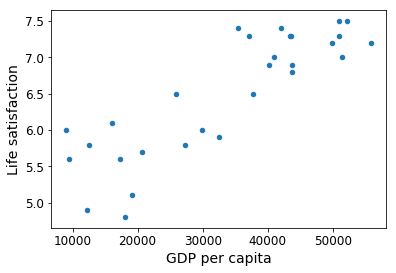

In [10]:
#Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

### Linear Regression model

Next, let's go to scikit-learn from help in performing regression. What we want to do now is to used these data points (think of them as simply, X and Y values in this plot) to find a linear function that best describes this scatter.

In [11]:
# Select as linear model
import sklearn
from sklearn import linear_model

# create an object for the linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

To look at what's inside the object `model', do this to show its dictionary. Can you make some guesses what some of those mean?

In [12]:
print(model.__dict__)

{'fit_intercept': True, 'normalize': False, 'copy_X': True, 'n_jobs': 1, 'coef_': array([[  4.91154428e-05]]), '_residues': array([ 5.24175965]), 'rank_': 1, 'singular_': array([ 77520.92109746]), 'intercept_': array([ 4.8530529])}


In [13]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


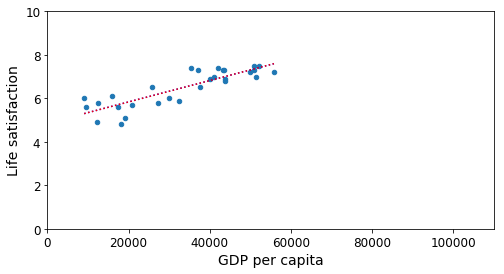

In [14]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 110000, 0, 10])

t0, t1 = model.intercept_[0], model.coef_[0][0]  
plt.plot(X, t0 + t1*X, "b:") # creates some intervals for us to plot dotted line 

# Uncomment the following line to see if the formula above (t0+t1*X) is really similar to model.predict() ?
plt.plot(X, model.predict(X.reshape(-1, 1)), "r:")
plt.show()

Make a prediction for Cyprus, which is one of the countries that did not have complete data. 

In [15]:
cyprus_gdp = gdp.loc["Cyprus"]["GDP per capita"]   # Get Cyprus' GDP per capita

X_new = cyprus_gdp  
print(model.predict(X_new)) # outputs around [[ 5.9624]]

[[ 5.96244747]]


**Q1**: Write a function to calculate the total residual loss of this model, with respect to the data we used to learn the model. 

In [16]:
import math

In [17]:
# original y value = y
# predicted y value = model.predict(X)

# to get the residual loss:


In [21]:
model.__dict__

{'_residues': array([ 5.24175965]),
 'coef_': array([[  4.91154428e-05]]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': array([ 4.8530529]),
 'n_jobs': 1,
 'normalize': False,
 'rank_': 1,
 'singular_': array([ 77520.92109746])}

### Back to the missing data

In [22]:
display(missing_data)

,GDP per capita,Life satisfaction
Country,,
Brazil,8670.00,7.0
Mexico,9009.28,6.7
Chile,13340.91,6.7
Czech Republic,17256.92,6.5
Norway,74822.11,7.4
Switzerland,80675.31,7.5
Luxembourg,101994.09,6.9


**Q2**: Observe how the missing data impacts the regression modeling, by performing the following tasks:

1. Perform prediction on all these left-out countries and find the error margin to know how far the predicted values are from the actual values.
2. Visualize this on the similar plot earlier, but using a different colour marker (mark the actual values of these countries with a different colour like red.) 
3. Learn another model which includes all country data (from the possible 36 countries). Plot the line in the same plot so that we can compare the two models.

### Polynomial Features (for Polynomial Regression)

Polynomial regression tries to fit your data to a polynomial function of $y_{i}= w_0 + w_1 x_i + w_2 x^2_i + \ldots + w_D x^D_i$, Now, polynomial regression is a form of "multiple linear regression". You can say it is a special case of multiple linear regression. When least squares fitting is performed, it does not know that $x^2$ is the square of $x$, it simply assumes it as just "another" variable. If we had only one type of data (GDP per capita), higher orders can be achieved by taking its 2nd power, 3rd power and so on.

When we looked at multiple regression or "multiple linear regression" in general, we can add more variables from other fields / attributes of the data such as Employment Rate, Air Pollution, etc. such that our order of features is more than just a single variable (GDP per capita). 

(36, 1)
(36, 60)


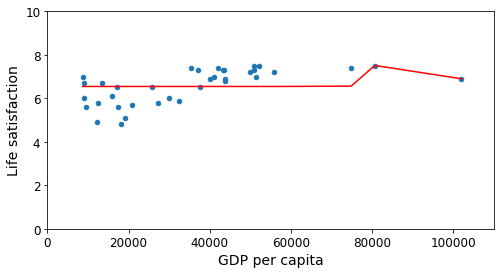

Predicted life satisfaction of Cyprus:  [[ 6.54626346]]


In [27]:
from sklearn import preprocessing
from sklearn import pipeline

Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]

# create polynomial model of degree 60
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
Xfull_t = poly.fit_transform(Xfull)
print(Xfull.shape)
print(Xfull_t.shape)

# Instantiate linear regression model
linreg = linear_model.LinearRegression()

# Fit and predict
linreg.fit(Xfull_t, yfull)
curve = linreg.predict(Xfull_t)

# plots
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 110000, 0, 10])
plt.plot(Xfull, curve, 'r')
plt.show()

# Try Cyprus again (data needs to be transformed to poly before prediction)
X_new_t = poly.fit_transform(X_new)
y_pred = linreg.predict(X_new_t)
print("Predicted life satisfaction of Cyprus: ", y_pred)

In [28]:
print(yfull.shape)

(36, 1)


In [29]:
#print(X_new_t)

Doesn't seem quite right actually. Order of polynomial = 60, but why is the plot looking like of much lower order?

If you test it out with low orders (e.g. 2, 3, 4), it looks fine actually.

/Users/user_adax/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


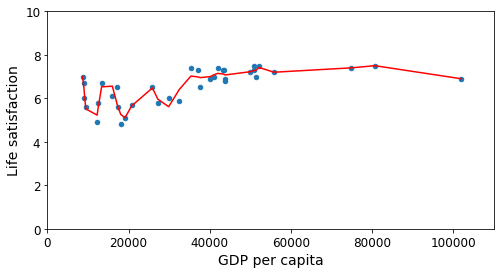

In [30]:
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

# pipeline sequentially applies a list of transforms followed by a final estimator.
# so this allows us to add another preprocessing step (scaler) to remove mean and scale to unit variance
# pipeline processes in order...
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
# Note: Try removing the scaler preprocessing step. you will get the same plot as earlier

# fit, then predict the whole bunch of data to get the curve
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(Xfull)

# plots
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 110000, 0, 10])
plt.plot(Xfull, curve, 'r')
plt.show()

**Q3**: How do we know what's the best polynomial order to model this data?

### Multiple Linear Regression (or Regression with Multiple Features)

**Q4**: Using the same idea as the polynomial regression, try using more features from the data that we have such as Air Pollution, Employment Rate, or anything else you think might impact life satisfaction. Pack them into an array (just like how `fit_transform()` worked previously) and try performing linear regression. It will be using multiple features.

*Important: If you are using different features with different numeric ranges, you MUST normalize them individually before performing regression.*

*Recall: There are techniques that we learned previously on how to perform data analysis on the variables to find out which ones have a high correlation.*

In [ ]:
# to check which of the variable are compatible 
# with each other e.x. all must be float64, etc
# full_country_stats.dtypes

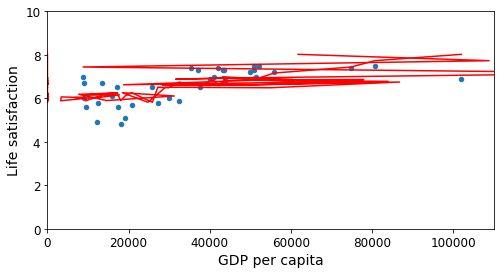

0.344087158297
12.3871376987


In [90]:
scaler3 = preprocessing.StandardScaler()
lin_reg3 = linear_model.LinearRegression()

pipeline_3 = pipeline.Pipeline([('scal', scaler3), ('lin', lin_reg3)])

pipeline_3.fit(Xfull, yfull)
curve3 = pipeline_3.predict(Xfull)

full_country_stats.plot(kind='scatter', 
                        x="GDP per capita", 
                        y='Life satisfaction', figsize=(8,4))
plt.axis([0, 110000, 0, 10])
plt.plot(Xfull, curve3, 'r')
plt.show()

resd3 = (yfull - curve3)**2
meanr3 =np.mean(resd3)
sumr3 = np.sum(resd3)
print(meanr3)
print(sumr3)

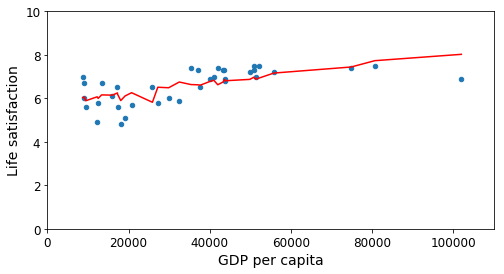

0.344087158297
12.3871376987


In [95]:
lin_reg4 = linear_model.LinearRegression()

lin_reg4.fit(Xfull, yfull)
curve4 = lin_reg4.predict(Xfull)

full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,4))
plt.axis([0, 110000, 0, 10])
plt.plot(Xfull[:,0], curve4, 'r')
plt.show()

resd4 = (yfull - curve4)**2
meanr4 =np.mean(resd4)
sumr4 = np.sum(resd4)
print(meanr4)
print(sumr4)

## Extra Exercise: Predicting House Prices

As usual, take a peek at the data first...

In [ ]:
pd.read_csv("housing.csv")

In [ ]:
housing.info()

In [ ]:
housing["ocean_proximity"].value_counts()

In [ ]:
housing.describe()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

### Training/test splits

In [ ]:
# to make this notebook's output identical at every run
np.random.seed(16)  # or any lucky number you wish

In [ ]:
import numpy as np

# For illustration only. sklearn has train_test_split() but this shows you how it is done internally
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

In [ ]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

test_set.head()

In [ ]:
housing_with_id = housing.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [ ]:
test_set.head()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=16)

In [ ]:
test_set.head()

### Do the rest

Now you should take over and do the rest. Here's a guide on what you can explore:

1. Analyse the data further to see what other statistics you can observe
2. Discover and visualize the data to gain insights
3. Prepare the data for regression
4. Select and train a model
5. Fine-tune your model (basically, find which models gets the best result)